<a href="https://colab.research.google.com/github/dhruvbhavsar0612/exploratory-data-analysis/blob/main/econData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy seaborn matplotlib fred plotly

  Preparing metadata (setup.py) ... done
  Created wheel for fred: filename=fred-3.1-py3-none-any.whl size=3896 sha256=b21de95cee846998d6c527de3caef89da9ca6debd5bc47adabdba8279115167c
  Stored in directory: /root/.cache/pip/wheels/ff/66/4e/52148d2f8680f6fbc96635c13272981a9b058af93bda192e28
Successfully built fred


In [2]:
!pip install fredapi

## Economical data analytics

Analyzing data scrapped from fredapi using python library - fred

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
from fredapi import Fred
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
#e3b542f29ce451b4ff8699dc09dfb375
#https://api.stlouisfed.org/fred/series/search?api_key=e3b542f29ce451b4ff8699dc09dfb375&search_text=canada


In [6]:
fred_key = 'e3b542f29ce451b4ff8699dc09dfb375'

# Create the Fred object

In [7]:
fredObject = Fred(api_key = fred_key)

# Search for the economic data

In [8]:
snp_search_results = fredObject.search('S&P', order_by='popularity')
snp_search_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-31,2023-08-31,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-31 08:59:09-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-31,2023-08-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-08-29 08:11:02-05:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-31,2023-08-31,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-31 08:59:13-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-31,2023-08-31,S&P 500,2013-09-03,2023-08-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-30 19:10:59-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-31,2023-08-31,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-08-31,2023-08-31,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01ILA156NWDB,DDEM01ILA156NWDB,2023-08-31,2023-08-31,Stock Market Turnover Ratio (Value Traded/Capi...,1995-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:28:54-05:00,3,Total value of shares traded during the period...
DDEM01JOA156NWDB,DDEM01JOA156NWDB,2023-08-31,2023-08-31,Stock Market Turnover Ratio (Value Traded/Capi...,2007-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...


In [9]:
snp_search_results.shape

(1000, 15)

## PUlling the raw data

In [10]:
snp500 = fredObject.get_series('SP500')

<Axes: title={'center': 'S and P 500'}>

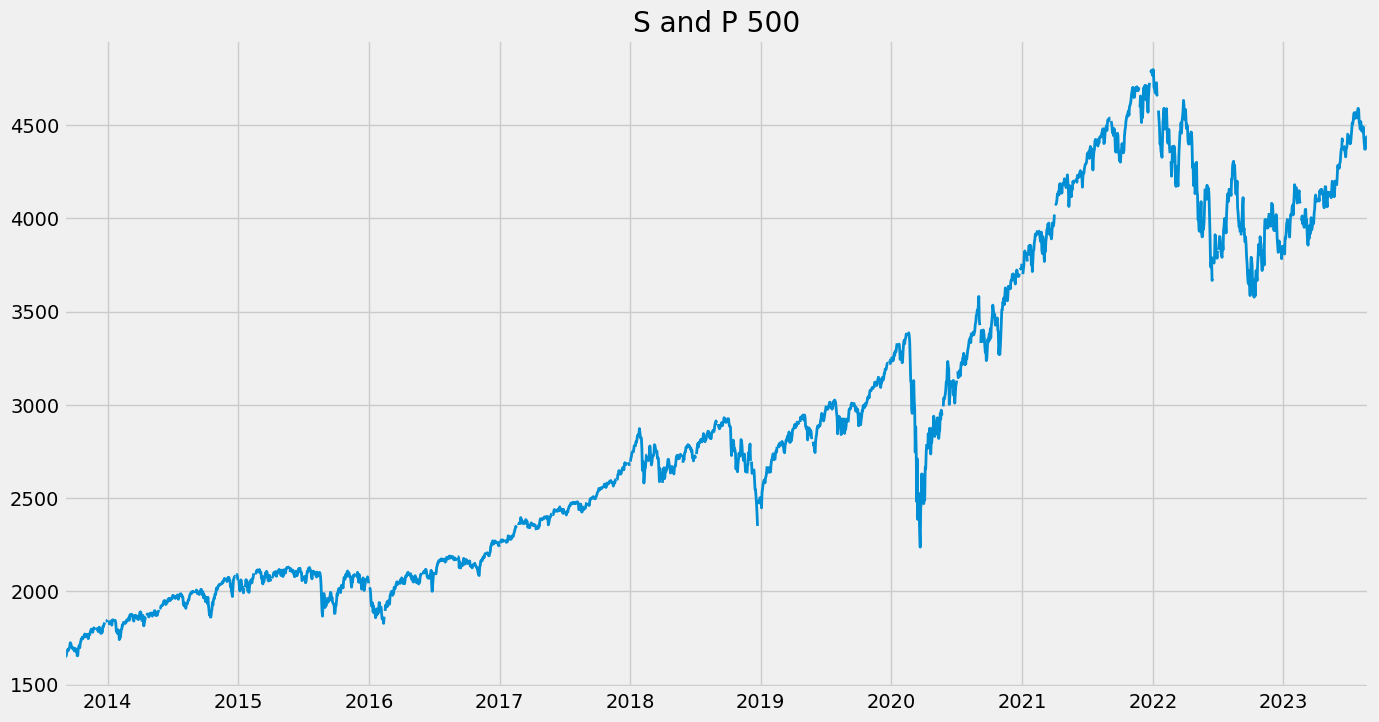

In [11]:
snp500.plot(figsize=(15,8), title='S and P 500', lw = 2)

## Pull different time series and data from fred to merge into dataframe

In [12]:
unempResults= fredObject.search('Unemployment state', filter = ('frequency', 'Monthly'))

In [13]:
unrate =fredObject.get_series('UNRATE')

<Axes: >

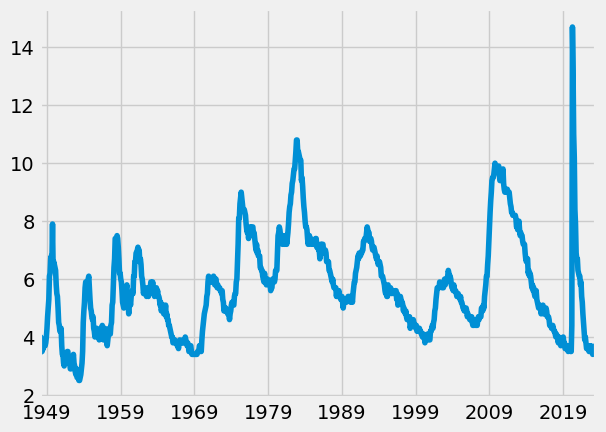

In [14]:
unrate.plot()

In [15]:
unemp_df = fredObject.search('Unemployment state', filter = ('frequency', 'Monthly'))

In [16]:
unemp_df = unemp_df.query('seasonal_adjustment_short == "SA" and units == "Percent"')

In [17]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [47]:
unemp_df = unemp_df[unemp_df['title'].str.contains('Unemployment Rate in')]

In [48]:
unemp_df.index

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'ALUR', 'MIUR', 'COUR', 'ILUR',
       'PAUR', 'NJUR', 'TNUR', 'GAUR', 'IAUR', 'MNUR', 'NCUR', 'INUR', 'SCUR',
       'AZUR', 'VAUR', 'MAUR', 'WIUR', 'WVUR', 'WAUR', 'KYUR', 'ARUR', 'MOUR',
       'MDUR', 'ORUR', 'UTUR', 'NMUR', 'OKUR', 'MTUR', 'AKUR', 'LAUR', 'NVUR',
       'LASMT261982000000003', 'MSUR', 'KSUR', 'NDUR', 'WYUR', 'PRUR', 'HIUR',
       'DCUR', 'CTUR', 'NEUR', 'IDUR', 'SDUR', 'NHUR', 'DEUR', 'VTUR',
       'LASMT391746000000003', 'MEUR', 'RIUR', 'CMWRUR', 'CSOUUR', 'CNEWUR',
       'USAURAMS', 'CNERUR'],
      dtype='object', name='series id')

In [49]:
all_results = []
for myid in unemp_df.index:
  results = fredObject.get_series(myid)
  results = results.to_frame(name = myid)
  all_results.append(results)

In [69]:
all_results[2]

,FLUR
1976-01-01,9.7
1976-02-01,9.7
1976-03-01,9.6
1976-04-01,9.5
1976-05-01,9.3
...,...
2023-03-01,2.6
2023-04-01,2.6
2023-05-01,2.6
2023-06-01,2.6


In [74]:
states = pd.concat(all_results, axis = 1 ).filter(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'OHUR', 'ALUR', 'MIUR', 'COUR', 'ILUR',
       'PAUR', 'NJUR', 'TNUR', 'GAUR', 'IAUR', 'MNUR', 'NCUR', 'INUR', 'SCUR',
       'AZUR', 'VAUR', 'MAUR', 'WIUR', 'WVUR', 'WAUR', 'KYUR', 'ARUR', 'MOUR',
       'MDUR', 'ORUR', 'UTUR', 'NMUR', 'OKUR', 'MTUR', 'AKUR', 'LAUR', 'NVUR', 'MSUR', 'KSUR', 'NDUR', 'WYUR', 'PRUR', 'HIUR',
       'DCUR', 'CTUR', 'NEUR', 'IDUR', 'SDUR', 'NHUR', 'DEUR', 'VTUR',
        'MEUR', 'RIUR', 'CMWRUR', 'CSOUUR', 'CNEWUR',
       'USAURAMS', 'CNERUR'])

In [75]:
states

,CAUR,TXUR,FLUR,NYUR,OHUR,ALUR,MIUR,COUR,ILUR,PAUR,...,NHUR,DEUR,VTUR,MEUR,RIUR,CMWRUR,CSOUUR,CNEWUR,USAURAMS,CNERUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,5.8,6.6,8.0,...,6.5,8.0,8.6,8.7,7.8,6.8,6.9,9.6,NaN,9.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,5.7,6.6,8.1,...,6.5,8.0,8.6,8.7,7.8,6.8,6.9,9.6,NaN,9.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,9.9,5.7,6.6,8.1,...,6.5,8.0,8.6,8.6,7.7,6.8,6.9,9.6,NaN,9.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.5,9.8,5.6,6.6,8.1,...,6.5,8.1,8.6,8.6,7.7,6.7,6.8,9.4,NaN,9.5
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.4,9.6,5.6,6.6,8.1,...,6.5,8.3,8.5,8.5,7.7,6.6,6.7,9.3,NaN,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,4.0,2.6,4.1,3.8,2.3,4.1,2.8,4.4,4.2,...,2.4,4.4,2.7,2.6,3.1,3.4,3.3,3.4,NaN,3.8
2023-04-01,4.5,4.0,2.6,4.0,3.7,2.2,3.8,2.8,4.2,4.1,...,2.1,4.3,2.4,2.4,3.0,3.3,3.3,3.2,NaN,3.7
2023-05-01,4.5,4.1,2.6,3.9,3.6,2.2,3.7,2.8,4.1,4.0,...,1.9,4.2,2.1,2.4,3.0,3.2,3.3,3.0,NaN,3.6
2023-06-01,4.6,4.1,2.6,3.9,3.4,2.2,3.6,2.8,4.0,3.8,...,1.8,4.2,1.9,2.4,2.9,3.2,3.2,2.8,NaN,3.5


<Axes: >

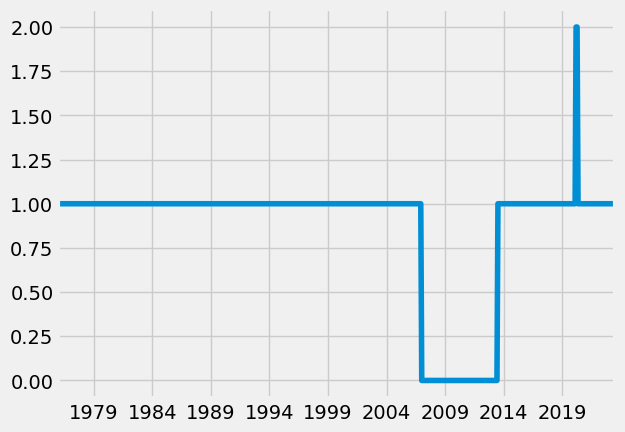

In [76]:
states.isna().sum(axis=1).plot()

In [61]:
states.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 571 entries, 1976-01-01 to 2023-07-01
Freq: MS
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAUR      571 non-null    float64
 1   TXUR      571 non-null    float64
 2   FLUR      571 non-null    float64
 3   NYUR      571 non-null    float64
 4   OHUR      571 non-null    float64
 5   ALUR      571 non-null    float64
 6   MIUR      571 non-null    float64
 7   COUR      571 non-null    float64
 8   ILUR      571 non-null    float64
 9   PAUR      571 non-null    float64
 10  NJUR      571 non-null    float64
 11  TNUR      571 non-null    float64
 12  GAUR      571 non-null    float64
 13  IAUR      571 non-null    float64
 14  MNUR      571 non-null    float64
 15  NCUR      571 non-null    float64
 16  INUR      571 non-null    float64
 17  SCUR      571 non-null    float64
 18  AZUR      571 non-null    float64
 19  VAUR      571 non-null    float64
 20  MAUR

In [77]:
states.drop(['USAURAMS','PRUR'], axis=1, inplace=True)

In [78]:
states.dropna()

,CAUR,TXUR,FLUR,NYUR,OHUR,ALUR,MIUR,COUR,ILUR,PAUR,...,SDUR,NHUR,DEUR,VTUR,MEUR,RIUR,CMWRUR,CSOUUR,CNEWUR,CNERUR
1976-01-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,5.8,6.6,8.0,...,3.3,6.5,8.0,8.6,8.7,7.8,6.8,6.9,9.6,9.6
1976-02-01,9.2,5.8,9.7,10.3,8.1,6.6,9.9,5.7,6.6,8.1,...,3.3,6.5,8.0,8.6,8.7,7.8,6.8,6.9,9.6,9.6
1976-03-01,9.1,5.9,9.6,10.2,8.1,6.6,9.9,5.7,6.6,8.1,...,3.2,6.5,8.0,8.6,8.6,7.7,6.8,6.9,9.6,9.6
1976-04-01,9.1,5.9,9.5,10.2,8.0,6.5,9.8,5.6,6.6,8.1,...,3.1,6.5,8.1,8.6,8.6,7.7,6.7,6.8,9.4,9.5
1976-05-01,9.0,5.9,9.3,10.1,7.8,6.4,9.6,5.6,6.6,8.1,...,3.1,6.5,8.3,8.5,8.5,7.7,6.6,6.7,9.3,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.4,4.0,2.6,4.1,3.8,2.3,4.1,2.8,4.4,4.2,...,1.9,2.4,4.4,2.7,2.6,3.1,3.4,3.3,3.4,3.8
2023-04-01,4.5,4.0,2.6,4.0,3.7,2.2,3.8,2.8,4.2,4.1,...,1.9,2.1,4.3,2.4,2.4,3.0,3.3,3.3,3.2,3.7
2023-05-01,4.5,4.1,2.6,3.9,3.6,2.2,3.7,2.8,4.1,4.0,...,1.9,1.9,4.2,2.1,2.4,3.0,3.2,3.3,3.0,3.6
2023-06-01,4.6,4.1,2.6,3.9,3.4,2.2,3.6,2.8,4.0,3.8,...,1.8,1.8,4.2,1.9,2.4,2.9,3.2,3.2,2.8,3.5


In [95]:
states.dropna(inplace=True)
px.line(states)

## Pulling april 2020 unemployment rate per US state

In [97]:
april2020 = states.loc[states.index == '2020-04-01'].T.sort_values('2020-04-01')

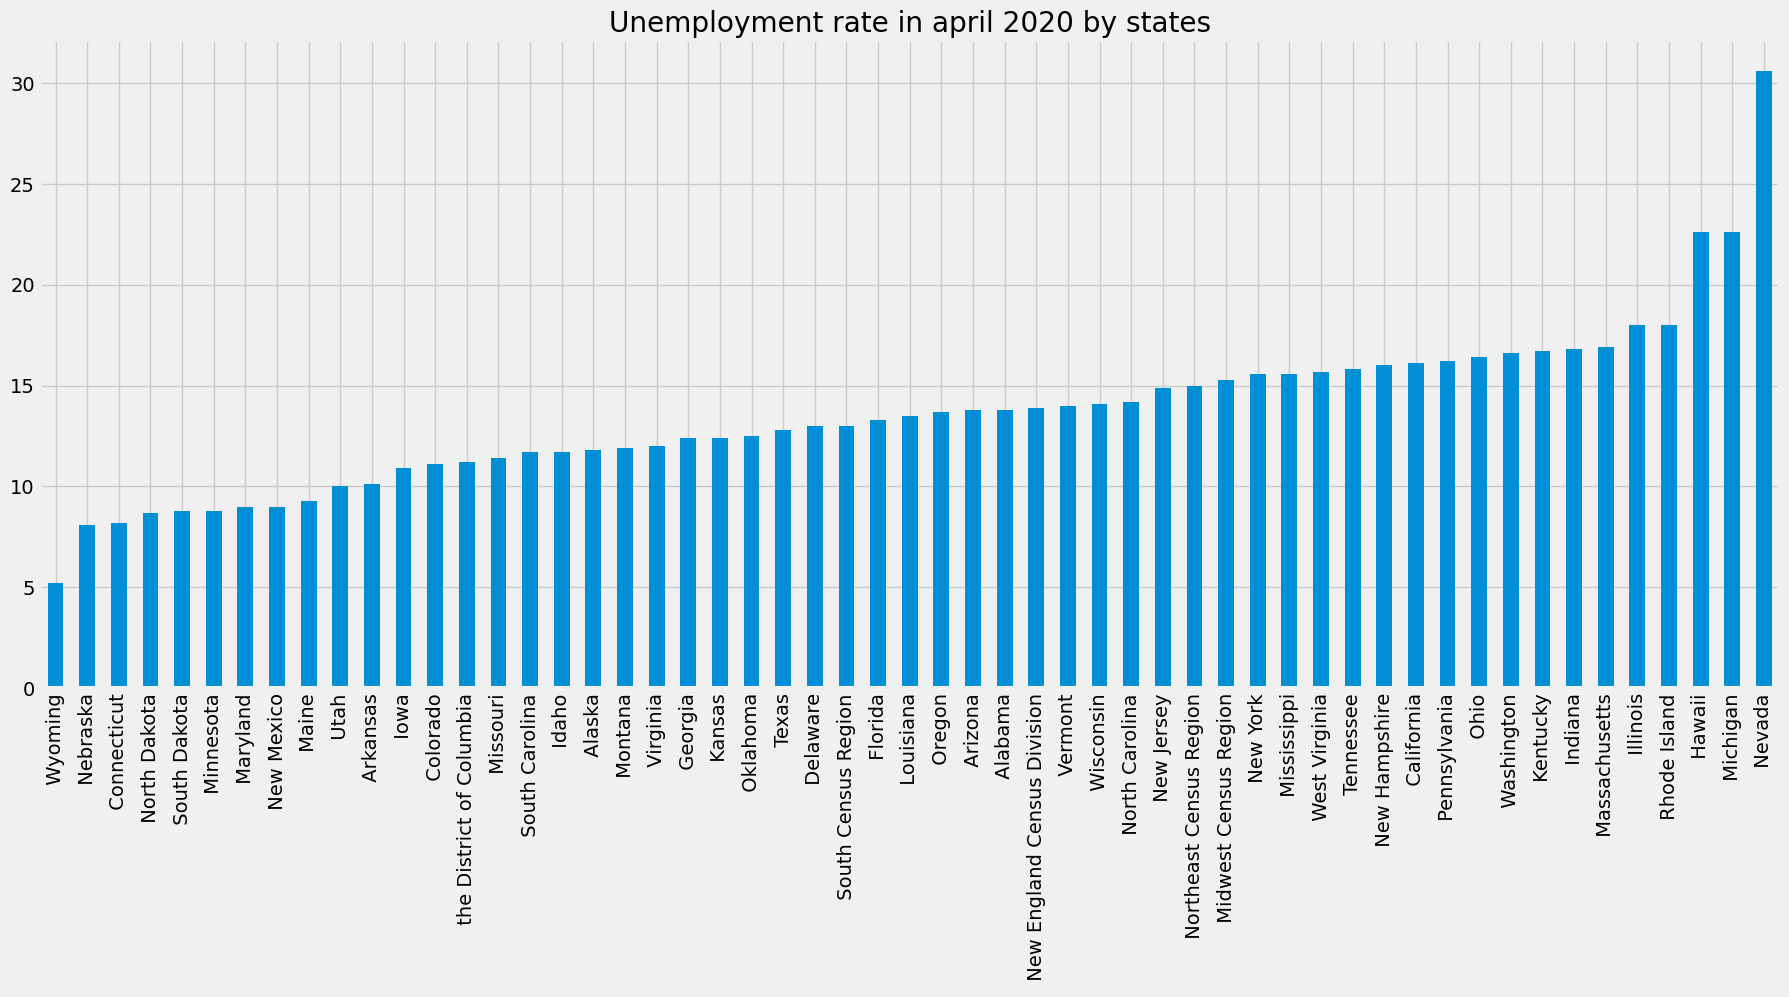

In [98]:
april2020.plot(kind='bar', figsize=(20,8), title="Unemployment rate in april 2020 by states")
plt.legend().remove()
plt.show()

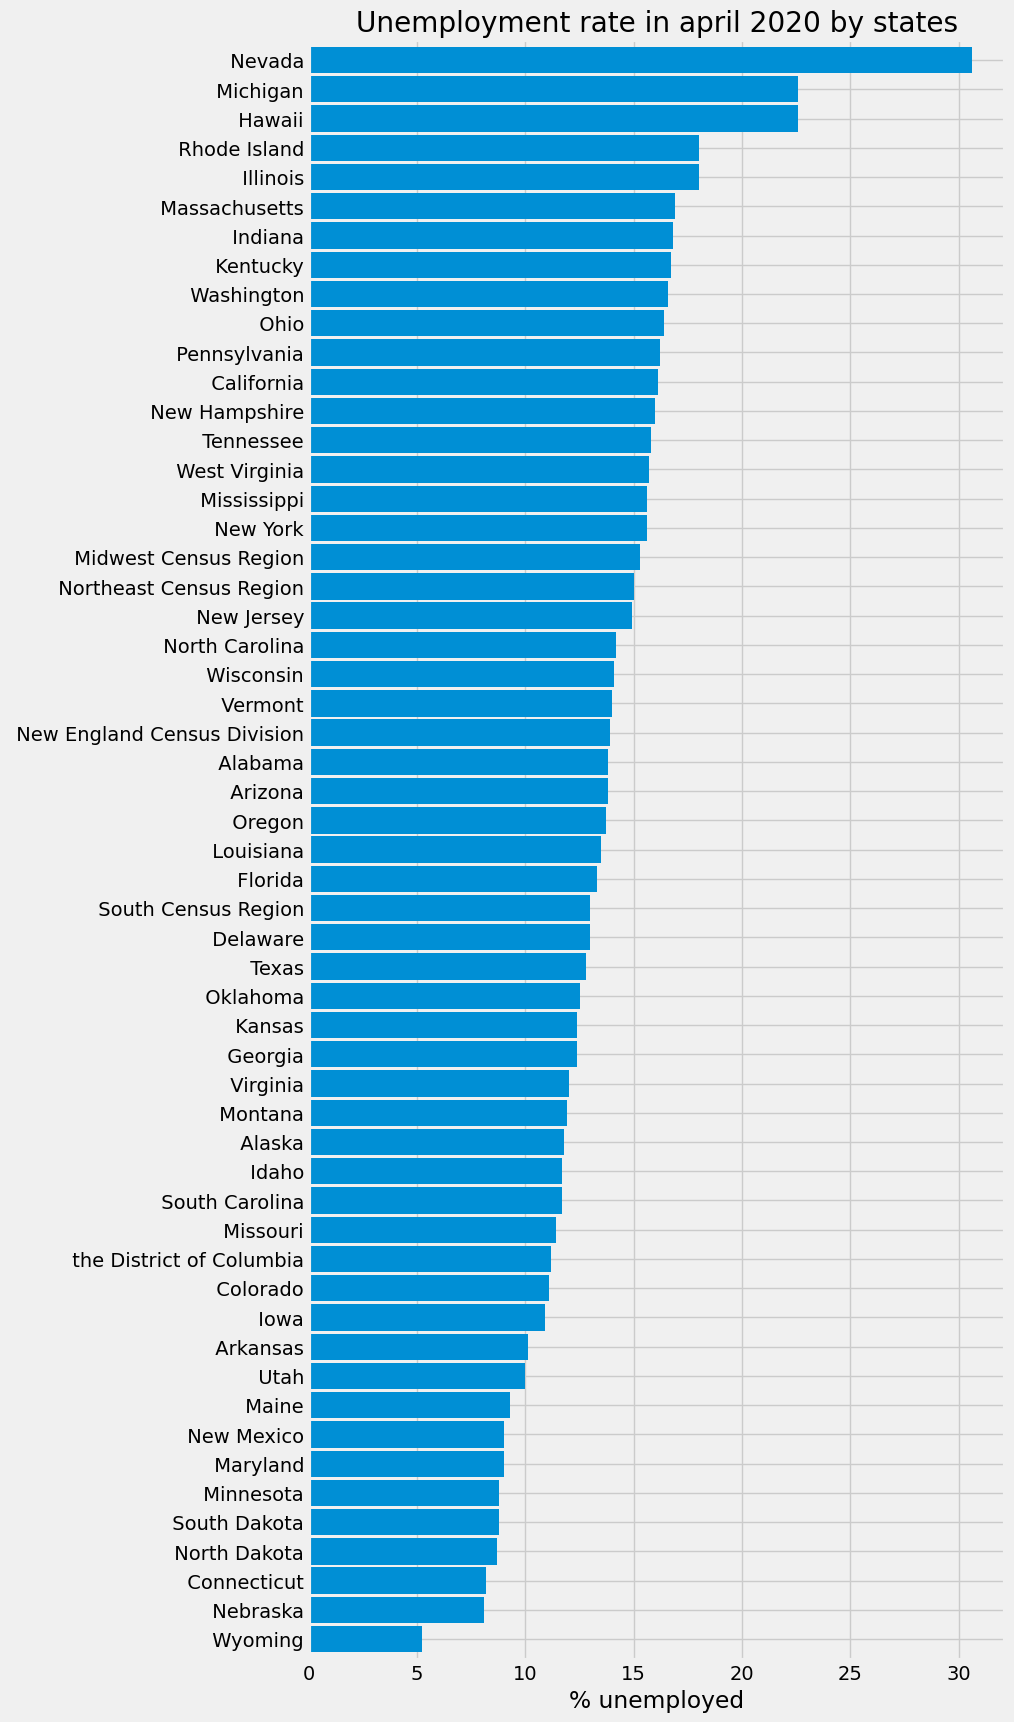

In [100]:
april2020.plot(kind='barh', figsize=(8,20),width=.9, title="Unemployment rate in april 2020 by states")
plt.legend().remove()
plt.xlabel('% unemployed')

plt.show()

We can observe that Nevada and Missouri had the highest unemployment rate among the states that we fetched from the fred api.

And Wyoming had to least unemployment rate in april 2020, the times when covid-19 hit the entire world, all the industries and caused lot of depression in  the market

In [85]:
#id_to_states = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [89]:
#states.columns = [id_to_states[c] for c in states.columns]

In [101]:
#states.head()

## Pull participation rate

In [102]:
part_df = fredObject.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment_short == "SA" and units == "Percent"')

In [ ]:
part_df

In [109]:
id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [ ]:
id_to_state

In [111]:
all_results = []

for myid in part_df.index:
  results = fredObject.get_series(myid)
  results  = results.to_frame(name=myid)
  all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [114]:
part_states.columns = [id_to_state[c] for c in part_states.columns]

In [116]:
part_states

,Labor Force Participation Rate,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - Women,Labor Force Participation Rate - Men,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - Black or African American,Labor Force Participation Rate - 20-24 Yrs.,Activity Rate: Aged 25-54: Males for the United States,Alabama,...,Inactivity Rate: Aged 25-54: All Persons for the United States,Activity Rate: Aged 15 and Over: Males for the United States,Inactivity Rate: Aged 15 and Over: Females for the United States,Inactivity Rate: Aged 15 and Over: Males for the United States,Activity Rate: Aged 15 and Over: Females for the United States,Inactivity Rate: Aged 15-24: All Persons for the United States,Inactivity Rate: Aged 15 and Over: All Persons for the United States,Activity Rate: Aged 15 and Over: All Persons for the United States,Inactivity Rate: Aged 15-64: Females for the United States,Inactivity Rate: Aged 15-74: All Persons for the United States
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,NaN,64.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,NaN,64.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,NaN,63.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,NaN,63.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,NaN,63.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,62.6,83.1,57.1,68.4,38.6,37.4,64.1,72.0,89.1,56.7,...,16.832002,68.4,42.895344,31.618133,57.1,43.185638,37.383202,62.6,30.443857,32.092319
2023-04-01,62.6,83.3,57.3,68.1,38.4,37.1,63.0,70.9,89.2,56.8,...,16.680719,68.1,42.733593,31.902575,57.3,43.768637,37.439527,62.6,30.255401,32.129475
2023-05-01,62.6,83.4,57.3,68.1,38.4,36.8,63.2,71.5,89.1,56.9,...,16.670055,68.1,42.689235,31.933702,57.3,43.746889,37.431831,62.6,30.111859,32.121312
2023-06-01,62.6,83.5,57.3,68.1,38.3,36.3,62.6,71.0,89.2,57.0,...,16.615836,68.1,42.727579,31.878412,57.3,44.118067,37.424897,62.6,30.059394,32.089733
